## Data Wrangle and Analyze with Tweet WeRateDogs data

## Gathering

In [1]:
# import library
import pandas as pd
import numpy as np
import requests
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import time
import re 

%matplotlib inline

In [75]:
# read data from twitter archive file given as data
twitter_arc = pd.read_csv('twitter_archive_enhanced.csv')
twitter_arc.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
# scrape the image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# load the image predictions file
images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [6]:
# fetch consumer key,consumer secret,access key,access secret by twitter developer account using that call api and get data
consumer_key = 'bXyUbtQtSIdLBaixrhcB4mf2a'
consumer_secret = 'xL820OYbdLWUFXAfInkz1EEiTcosLbcEd1rAgs5Bvn5wgykDCb'
access_token = '148414717-0nU8rQFji5RPyKWkQpCUbkWhc2QSKHsxvKCFlQu8'
access_secret = 'CQ4woWjUjMlnpzvsdk7xCMD1jfyihLpD7IRBIALHwvuCG'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
tweet_ids = list(twitter_arc['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 673


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 673


In [8]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [9]:
twitter_api = pd.read_json('tweet_json.txt')
twitter_api['tweet_id'] = tweet_id_success
twitter_api = twitter_api[['tweet_id','favorite_count','retweet_count']]
twitter_api.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36069,7678


## Assess

In [10]:
twitter_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11,10,Duke,None,None,None,None
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None


In [11]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
sum(twitter_arc['tweet_id'].duplicated())

0

In [13]:
twitter_arc['retweeted_status_id'].value_counts(sort=True)

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [14]:
twitter_arc['retweeted_status_user_id'].value_counts(sort=True)

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [15]:
twitter_arc['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Evy          1
Pancake      1
Aldrick      1
Lambeau      1
Brian        1
Name: name, Length: 957, dtype: int64

In [16]:
twitter_arc['rating_numerator'].value_counts(sort=True)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
twitter_arc['rating_denominator'].value_counts(sort=True)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_arc['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
twitter_arc['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
twitter_arc['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
twitter_arc['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,Pembroke,0.939134,True,Cardigan,0.054336,True,Chihuahua,0.005590,True
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
936,703425003149250560,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True


In [23]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
sum(images['tweet_id'].duplicated())

0

In [25]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg    2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg    2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg    2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg    2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg    2
                                                  ..
https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg    1
https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg    1
https://pbs.twimg.com/media/C3s_pYrXAAA1eqZ.jpg    1
https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg    1
https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [26]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
military_uniform        1
pitcher                 1
bannister               1
padlock                 1
school_bus              1
Name: p1, Length: 378, dtype: int64

In [27]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
leafhopper              1
academic_gown           1
komondor                1
goose                   1
dam                     1
Name: p2, Length: 405, dtype: int64

In [28]:
images['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bell_cote              1
mosquito_net           1
bulletproof_vest       1
otter                  1
red_wolf               1
Name: p3, Length: 408, dtype: int64

In [29]:
twitter_api.sample(5)

,tweet_id,favorite_count,retweet_count
1134,724049859469295616,4272,1755
2312,666268910803644416,95,32
1510,689993469801164801,1452,446
22,887473957103951883,64181,16342
1337,703079050210877440,7325,3054


In [30]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [31]:
sum(twitter_api['tweet_id'].duplicated())

0

In [32]:
twitter_api['favorite_count'].value_counts()

0        163
1472       4
233        3
316        3
424        3
        ... 
619        1
2144       1
23150      1
1250       1
607        1
Name: favorite_count, Length: 2006, dtype: int64

In [33]:
twitter_api.sort_values(['favorite_count'], ascending = False)

,tweet_id,favorite_count,retweet_count
1015,744234799360020481,155526,77506
397,822872901745569793,132536,43631
517,807106840509214720,120131,56475
129,866450705531457537,116011,32824
1055,739238157791694849,114912,57499
...,...,...,...
676,786729988674449408,0,2466
674,787111942498508800,0,6866
668,788070120937619456,0,3496
664,788552643979468800,0,7311


## Assessment Summary
### Quality Issues
#### twitter_arc dataframe
-   tweet_id is an integer
-   timestamp and retweeted_status_timestamp are currently of type 'object'
-   name has values that are the string "None" instead of NaN
-   Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
-   doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
-   Incorrected ratings on rating_numerator and rating_denominator.

#### twitter_api dataframe
-   There are 11 missing tweets compared to the twitter_arc datagrame (I am assuming they have been deleted)

#### images dataframe
-   There are 2356 tweets in the twitter_arc dataframe and 2075 rows in the images dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures.
-   tweet_id is an integer
-   p1, p2, and p3 contain underscores instead of spaces in the labels

### Tidiness Issues
#### twitter_arc dataframe
-   1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

#### twitter_api dataframe
-   twitter_api data should be combined with the twitter_arc data since they are information about the same tweet

####  images dataframe
-   images data could be combined with the twitter_arc data as well since it is all information about 1 tweet

## Clean

In [34]:
# make copies of dataframe for cleaning
twitter_arc_clean = twitter_arc.copy()
twitter_api_clean = twitter_api.copy()
images_clean = images.copy()

### Tidiness Issues 1 - Merge dataframe into one dataframe
-   twitter_api and images dataframe almost same just image data have to add in to twitter_api so merge all three dataset using tweet_id 


In [35]:
dfs = [twitter_arc_clean,twitter_api_clean,images_clean]
twitter_main = twitter_arc_clean.merge(twitter_api_clean,on='tweet_id').merge(images_clean,on='tweet_id')
twitter_main.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [36]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

### Tidiness issue 2 - One column for dog stages
-   1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo) and set None insted of 'NaN' 

In [37]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter_main['dog_stage'] = twitter_main['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [38]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
twitter_main[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [39]:
twitter_main = twitter_main.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [40]:
twitter_main['dog_stage'].replace(np.nan,'None',inplace=True)
twitter_main.dog_stage.head(10)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9    doggo
Name: dog_stage, dtype: object

In [41]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  favorite_count              2059 

### Quality issue 1 - Remove retweets
-  Remove retweets data. Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.

In [42]:
twitter_main = twitter_main[np.isnan(twitter_main.retweeted_status_id)]
twitter_main.shape[0]

1987

In [43]:
twitter_main = twitter_main.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'],axis=1)

In [44]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1987 non-null   object 
 4   source                 1987 non-null   object 
 5   text                   1987 non-null   object 
 6   expanded_urls          1987 non-null   object 
 7   rating_numerator       1987 non-null   int64  
 8   rating_denominator     1987 non-null   int64  
 9   name                   1987 non-null   object 
 10  favorite_count         1987 non-null   int64  
 11  retweet_count          1987 non-null   int64  
 12  jpg_url                1987 non-null   object 
 13  img_num                1987 non-null   int64  
 14  p1                     1987 non-null   object 
 15  p1_c

### Quality issue 2 - tweet_id type
-    Convert tweet_id to a string/object

In [45]:
twitter_main['tweet_id']=twitter_main['tweet_id'].astype(str)
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1987 non-null   object 
 4   source                 1987 non-null   object 
 5   text                   1987 non-null   object 
 6   expanded_urls          1987 non-null   object 
 7   rating_numerator       1987 non-null   int64  
 8   rating_denominator     1987 non-null   int64  
 9   name                   1987 non-null   object 
 10  favorite_count         1987 non-null   int64  
 11  retweet_count          1987 non-null   int64  
 12  jpg_url                1987 non-null   object 
 13  img_num                1987 non-null   int64  
 14  p1                     1987 non-null   object 
 15  p1_c

### Quality issue 3 - timestamp type
-   Convert timestamp to a datetime object 

In [46]:
twitter_main.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
291,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,https://twitter.com/dog_rates/status/828011680...,11,10,Brutus,...,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True,None


In [47]:
twitter_main['timestamp'] = twitter_main['timestamp'].str.slice(start=0,stop=-6)

In [48]:
twitter_main['timestamp'] = pd.to_datetime(twitter_main['timestamp'],format = '%Y-%m-%d %H:%M:%S')

In [49]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1987 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1987 non-null   datetime64[ns]
 4   source                 1987 non-null   object        
 5   text                   1987 non-null   object        
 6   expanded_urls          1987 non-null   object        
 7   rating_numerator       1987 non-null   int64         
 8   rating_denominator     1987 non-null   int64         
 9   name                   1987 non-null   object        
 10  favorite_count         1987 non-null   int64         
 11  retweet_count          1987 non-null   int64         
 12  jpg_url                1987 non-null   object        
 13  img

### Quality issue 4/5 - Various issues with name
-    name has values that are the string "None" instead of NaN
-    Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel,was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.

In [50]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter_main['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [51]:
# Replace all names that start with a lowercase letter with a NaN
twitter_main['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter_main['name'].replace('None', 
                        np.nan,
                       inplace = True)

In [52]:
twitter_main['name'].value_counts()

Cooper     10
Charlie    10
Oliver     10
Lucy        9
Tucker      9
           ..
Cupid       1
Dwight      1
Georgie     1
Jonah       1
Brian       1
Name: name, Length: 911, dtype: int64

### Quality issue 6 - Remove Unnessary columns

In [53]:
# View all column names
twitter_main.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

In [54]:
# Drop undesired columns to make dataframe easier to view
twitter_main.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

In [55]:
twitter_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1987 non-null   object        
 1   timestamp           1987 non-null   datetime64[ns]
 2   text                1987 non-null   object        
 3   expanded_urls       1987 non-null   object        
 4   rating_numerator    1987 non-null   int64         
 5   rating_denominator  1987 non-null   int64         
 6   name                1343 non-null   object        
 7   favorite_count      1987 non-null   int64         
 8   retweet_count       1987 non-null   int64         
 9   jpg_url             1987 non-null   object        
 10  p1                  1987 non-null   object        
 11  p1_conf             1987 non-null   float64       
 12  p1_dog              1987 non-null   bool          
 13  p2                  1987 non-null   object      

### Quality issue 7 - Inaccurate ratings
Define
Issue: Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).

Solution: Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

In [56]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter_main['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_index

[40, 548, 603, 1438]

In [57]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
for num in range(len(ratings_with_decimals_index)):
    twitter_main.loc[ratings_with_decimals_index[num],'rating_numerator'] = float(ratings_with_decimals[num])

In [58]:
twitter_main.loc[40]

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
favorite_count                                                    42797
retweet_count                                                      8984
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
p1                                                     golden_retriever
p1_conf                                                        0.943082
p1_dog                                                             True
p2                                                   Labrador_re

### Quality issue 8 - Rating_numberator and rating_denominator can be converted into one column

In [59]:
# Calulate the value of 'rating'
twitter_main['rating'] = twitter_main['rating_numerator'] / twitter_main['rating_denominator']

In [60]:
# Check for presence of new column and correct calculation
twitter_main.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,36069,7678,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,None,1.3


### Quality issue 9 - Rating outliers
-   Rating_numberator that are over 50 could be due to mistakes. removing the outliers to give more accurate data.

In [61]:
#remove rating_denominator grater than 50 
twitter_main.drop(twitter_main[twitter_main['rating_denominator']>=50].index, inplace=True)

In [62]:
twitter_main.rating_denominator.value_counts()

10    1969
11       2
40       1
20       1
7        1
2        1
Name: rating_denominator, dtype: int64

## Storing Dataframe

In [69]:
# Save twitter dataframe to a CSV file
twitter_main.to_csv('twitter_archive_master.csv', index = False)

In [70]:
df = pd.read_csv('twitter_archive_master.csv')
df.sample()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
649,759197388317847553,2016-07-30 01:22:17,This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12.0,10,Luna,6081,1952,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,...,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False,None,1.2


## Anayze and Visualize

### 1. Retweet Count vs Favourite Count

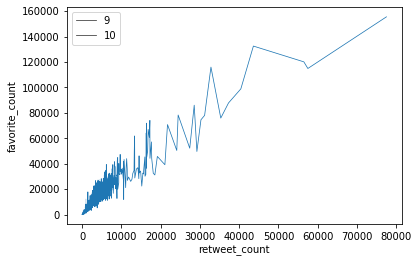

In [71]:
sns.lineplot(x='retweet_count',y='favorite_count',data=df,size=10);

There is a positive correlation between retweet count and favorite count. This make sense because both counts tend to be high if the tweet is very popular.

### 2. Dog Stage

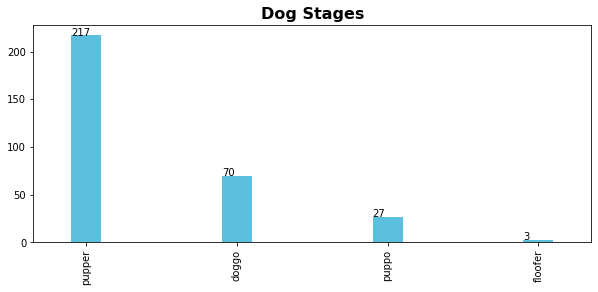

In [72]:
#make a Pie chart for dog stage counts
ax = ((df['dog_stage'].value_counts()).drop(labels = ['None'])).plot(kind='bar',width = 0.2,figsize=(10,4),color = '#5bc0de',edgecolor=None)

plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=16);

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (x, y + height + 0.01))

217 of dogs are in pupper stages, it could be young dogs are more adorable or people tend to take pictures during times when they recently adopted a new puppy. 

### 3. Top 10 dog breeds

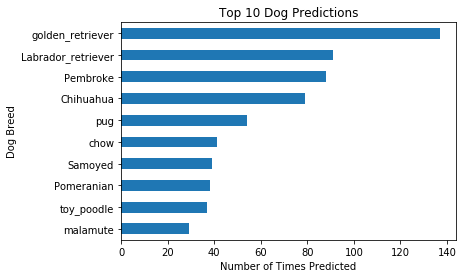

In [73]:
df['p1'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 12

Golden Retriever is the most lovable dog, Follow by Laborator retriever, pembroke, chihuahua, pug, etc.